#**Proyecto Final: Telecom Churn**

Agustin Zanotti


##Índice

1. Análisis y descripción del dataset

  1.1 Definición de Objetivos, Hipótesis y Audiencia
  
  1.2 Importación de datos y librerías

  1.3 EDA y Data Wrangling

2. Análisis Graficos

  2.1 Gráficos con Matplotlib
  
  2.2 Gráficos con Seaborn

3. Análisis de Variables

  3.1 Variables Categóricas

  3.2 Variables Categóricas y Tasa de abandono

  3.3 Duración del contrato y Tasa de abandono

  3.4 Servicio de internet y Tasa de abandono

  3.5 Descripción de variables numéricas
  
  3.6 Conclusiones

4. Feature Selection

  4.1 Forward Selection
  
  4.2 Stepwise Selection

5. Evaluación del Modelo

  5.1 Regresión

  5.2 Árbol de Decisión

6. Aprendizaje supervisado

7. Conclusiones
---

##1. Análisis y descripción del dataset

###1.1 Definición de Objetivos, Hipótesis y Audiencia

El objetivo de este trabajo es analizar el dataset "Telecom Churn" y encontrar cuales son los factores que mas influyen en la tasa de abandono de los clientes en una empresa de telecomunicaciones.

El analisis tiene un nivel de aplicación estratégico, ya que está orientado a la revisión de parte de niveles gerenciales dentro de la organización. Las decisiones que se van a tomar a partir de este trabajo, serán de mediano y largo plazo

Las empresas consideran importante conocer estas causas de abandono de clientes ya que, a partir de estos datos, pueden implementar estrategias para reducir la tasa de abandono y los costos de adquirir nuevos clientes.

---

###**Preguntas / Hipótesis**

El objetivo principal del trabajo es poder indentificar cuales son los clientes que tienen mas probabilidad de dejar la empresa y, también, determinar qué variables son las mas influyentes a la hora de la toma de decisión de los clientes.

En base a este objetivo, podemos formular las siguientes preguntas:

- ¿Existe una relación entre la edad del cliente y la cantidad de meses que lleva el cliente en servicio, con el abandono del mismo?
- ¿Influye el tipo de servicio contratado con la tasa de abandono?
- ¿Que otras variables son las mas influyentes para predecir la tasa de abandono?

A raíz de estas preguntas, intentaremos resolverlas a través del análisis de los datos y creando un modelo predictivo para calcular la probabilidad de abandono de clientes. Con los resultados obtenidos, se hará una recomendación sobre en que variables debería prestar atención la empresa para la toma de decisiones posterior.

###**Audiencia**

Este proyecto puede ser útil para directivos o gerentes de empresas que deban tomar decisiones respecto a su estratégia comercial.

###1.2 Importación de datos y librerías

In [67]:
#Importamos las librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [4]:
#Importo el dataset

df = '/content/drive/MyDrive/CODERHOUSE/DATA SCIENCE/3° Entrega/Telecom Churn.xlsx'
telecom = pd.read_excel (df)
telecom

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


###1.3 EDA Y DATA WRANGLING

El dataset contiene las siguientes variables:


*   customerID: Indentificador de cliente.
*   gender: Género del cliente.
*   SeniorCitizen: Indica si el cliente es adulto mayor.
*   Partner: Indica si el cliente tiene pareja.
*   Dependents: Indica si el cliente tiene dependientes.
*   tenure: Indica la cantidad de meses que el cliente ha permanecido en la empresa.
*   PhoneService: Indica si el cliente tiene servicio telefónico.
*   MultipleLines: Indica si el cliente tiene varias líneas.
*   InternetService: Indica el tipo de servicio de internet que tiene el cliente
*   OnlineSecurity: Indica si el cliente tiene seguridad Online.
*   OnlineBackup: Indica si el cliente tiene Backup Online.
*   DeviceProtection: Indica si el cliente tiene protección del dispositivo.
*   TechSupport: Indica si el cliente tiene soporte técnico.
*   StreamingTV: Indica si el cliente tiene servicio de televisión.
*   StreamingMovies: Indica si el cliente tiene servicio de películas.
*   Contract: Indica el tipo de contrato que tiene el cliente.
*   PaperlessBilling: Indica si el cliente recibe facturas electrónicas.
*   PaymentMethod: Indica el método de pago que utiliza el cliente.
*   MonthlyCharges: Indica el importe (en USD) que el cliente paga por mes.
*   TotalCharges: Indica el importe total (en USD) que el cliente ha pagado hasta la fecha.
*   Churn: Indica si el cliente abandonó la empresa.























In [ ]:
print(telecom.shape)

(7032, 21)


In [ ]:
#Vemos las caratcteristicas de los datos
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


###**ANALISIS DE NULOS**

In [ ]:
#Verificamos los valores faltantes
print("\nValores faltantes: \n", telecom.isnull().sum())


Valores faltantes: 
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
telecom.isna()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7028,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7029,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7030,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Estadísticas descriptivas de las variables numéricas
print("\nEstadísticas descriptivas de variables numericas: \n", telecom.describe(include=[np.number]))


Estadísticas descriptivas de variables numericas: 
        SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


###**BORRADO DE DUPLICADOS**

In [5]:
print(telecom.shape)
telecom= telecom.drop_duplicates()
print(telecom.shape)

(7032, 21)
(7032, 21)


In [6]:
#Reemplazo las variables categoricas por dummies
telecom['gender'].replace('Male','0', inplace=True)
telecom['gender'].replace('Female','1', inplace=True)
telecom['Dependents'].replace('No','0', inplace=True)
telecom['Dependents'].replace('Yes','1', inplace=True)
telecom['PhoneService'].replace('No','0', inplace=True)
telecom['PhoneService'].replace('Yes','1', inplace=True)
telecom['PaperlessBilling'].replace('No','0', inplace=True)
telecom['PaperlessBilling'].replace('Yes','1', inplace=True)
telecom['Churn'].replace('No','0', inplace=True)
telecom['Churn'].replace('Yes','1', inplace=True)

telecom

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,Yes,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,No,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,0,0,No,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,No,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,No,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,0,0,Yes,1,24,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7028,2234-XADUH,1,0,Yes,1,72,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7029,4801-JZAZL,1,0,Yes,1,11,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7030,8361-LTMKD,0,1,Yes,0,4,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


**LABEL ENCODER**

Reemplazo la variable 'gender', asignando el valor '0' para Male y '1' para Female

Reemplazo la variable 'dependents', asignando el valor '0' para No y '1' para Yes

Reemplazo la variable 'PhoneService', asignando el valor '0' para No y '1' para Yes

Reemplazo la variable 'PaperlessBilling', asignando el valor '0' para No y '1' para Yes

Reemplazo la variable 'Churn', asignando el valor '0' para No y '1' para Yes

##2. Análisis Gráficos

### 2.1 Gráficos con Matplotlib

In [ ]:
#Grafico para saber cantidad de personas por sexo

genero = telecom['gender'].value_counts()  #Con esto cuento la cantidad por genero
genero

Male      3549
Female    3483
Name: gender, dtype: int64

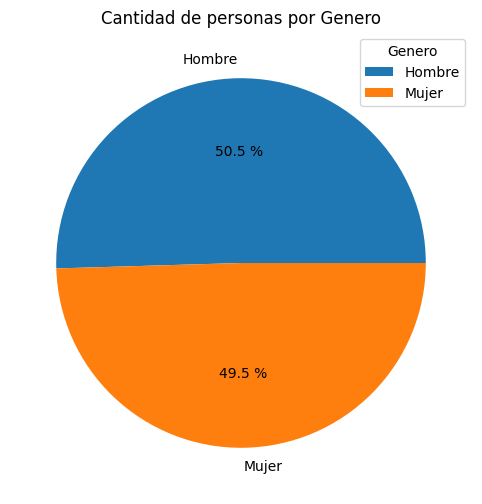

In [ ]:
sexo = ['Hombre', 'Mujer']
plt.figure(figsize = (9,6))
plt.pie(genero, labels = sexo, autopct="%0.1f %%") #Hacemos grafico de torta
plt.legend (title = 'Genero') #Leyenda
plt.title ('Cantidad de personas por Genero')
plt.show()

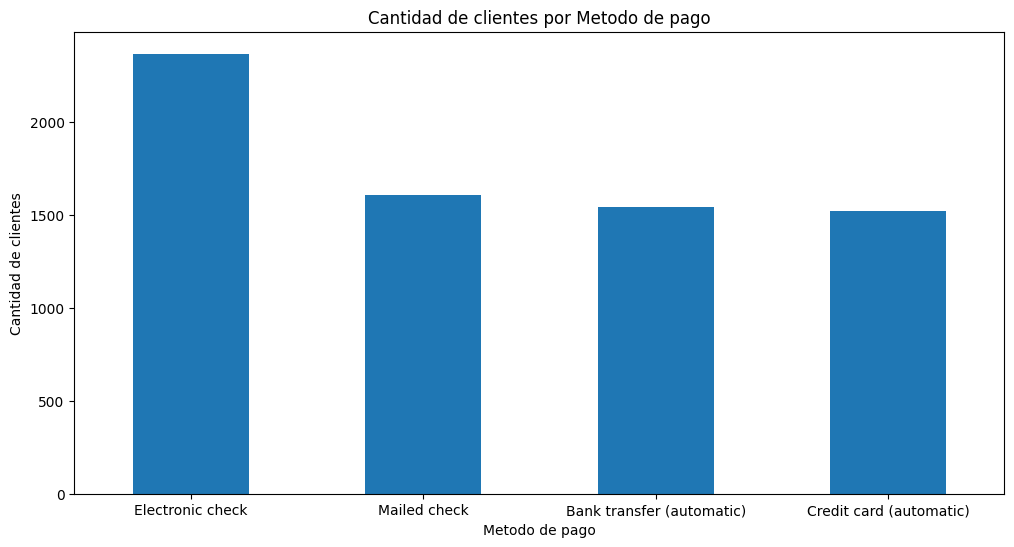

In [ ]:
#Grafico de barras para saber cantidad de clientes segun el método de pago de servicio

plt.figure (figsize = (12,6))
telecom ['PaymentMethod'].value_counts().plot(kind='bar') #Grafico de barras
plt.xlabel ('Metodo de pago') #Eje X
plt.ylabel ('Cantidad de clientes') #Eje Y
plt.title ('Cantidad de clientes por Metodo de pago') #titulo del grafico
plt.xticks(rotation=0)
plt.show()

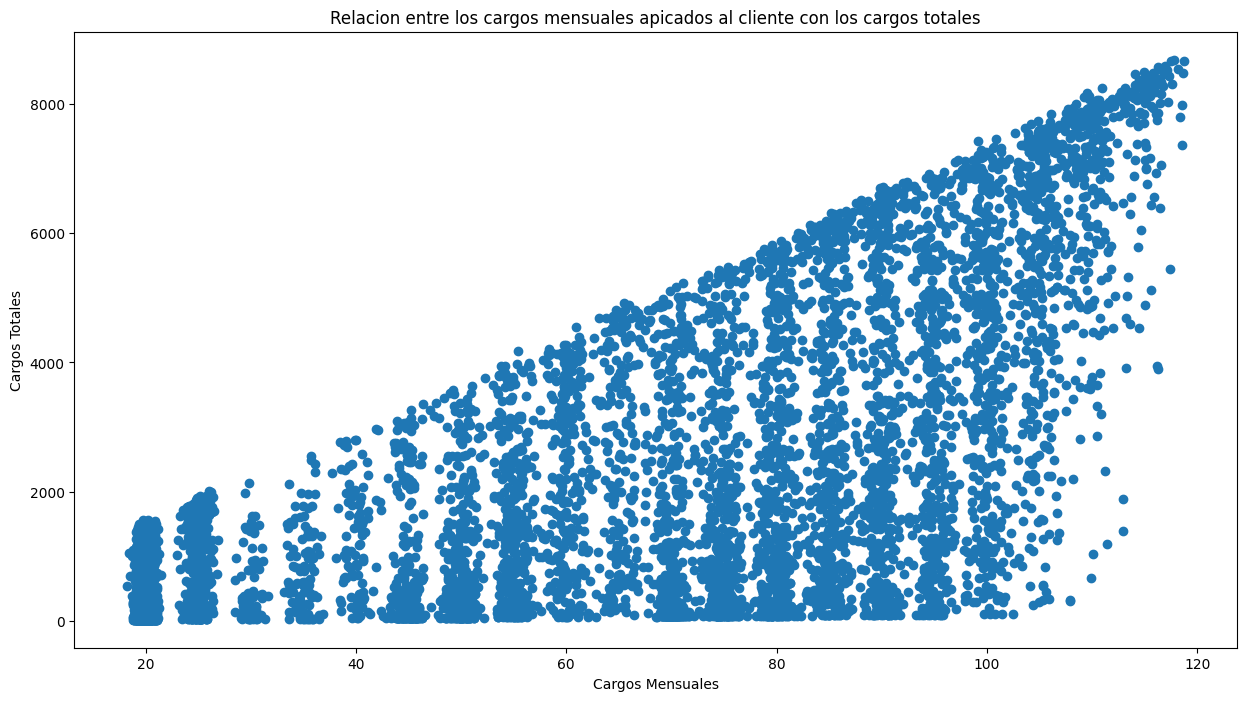

In [ ]:
#Grafico de dispersion

plt.figure(figsize=(15, 8))
plt.scatter(telecom['MonthlyCharges'], telecom['TotalCharges']) #Relacion entre los cargos mensuales apicados al cliente con los cargos totales
plt.xlabel('Cargos Mensuales')
plt.ylabel('Cargos Totales')
plt.title('Relacion entre los cargos mensuales apicados al cliente con los cargos totales')
plt.show()

####De este gráfico podemos visualizar que 'TotalCharges' y 'MonthlyCharges' tienen una relación lineal entre ambas. Es decir, como lo explica la misma variable 'TotalCharges' es el total de dinero que ha pagado un cliente desde que se unió a la empresa. Por lo tanto lo que ha ido pagando mes a mes completa el total hasta el día en que se tomó el dato. Por eso guardan una alta correlación entre ambas variables.

---

###2.2 Gráficos con Seaborn

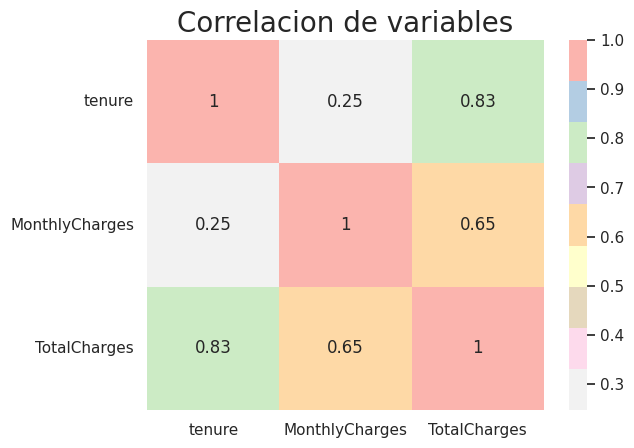

In [ ]:
matcor=telecom[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.set(font_scale=1)
sns.heatmap(matcor, annot=True, cmap='Pastel1_r')
plt.title('Correlacion de variables', fontsize=20)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

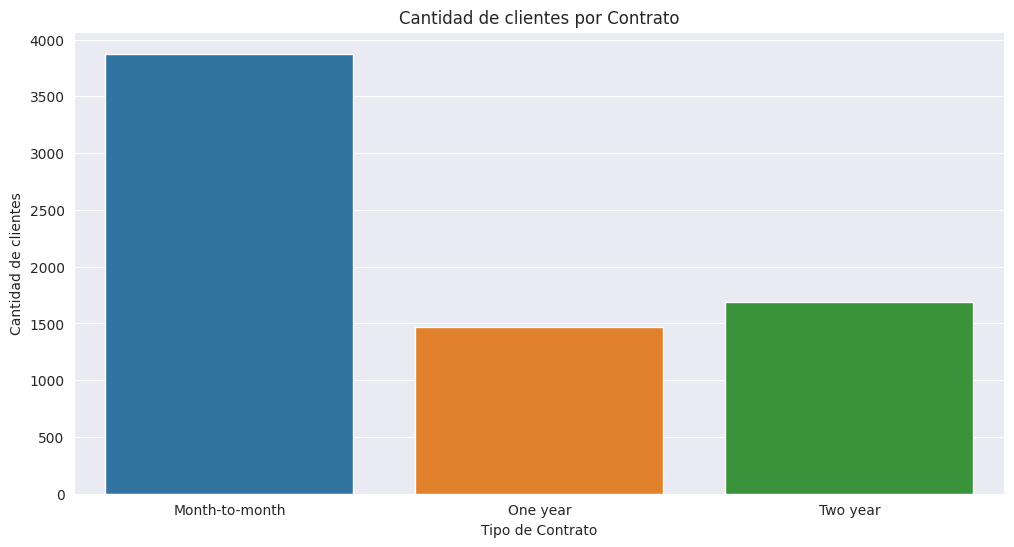

In [ ]:
sns.set_style("darkgrid")
plt.figure (figsize = (12, 6))
sns.countplot(data=telecom, x='Contract')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de clientes')
plt.title('Cantidad de clientes por Contrato')
plt.show()

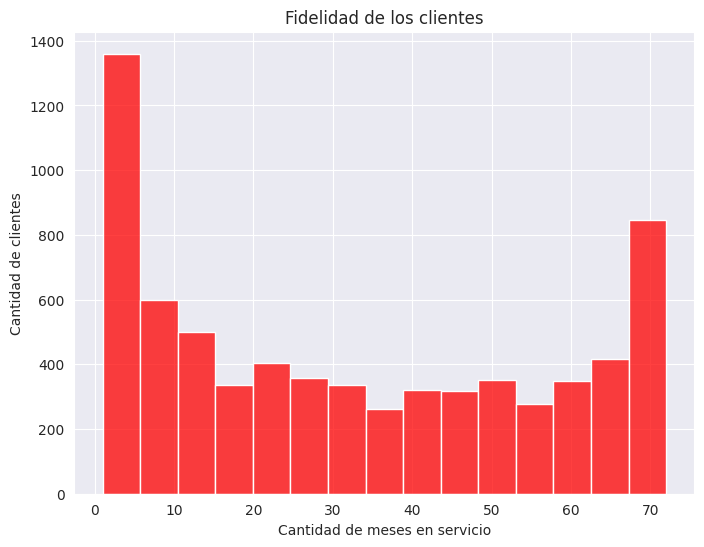

In [ ]:
#Histograma

plt.figure (figsize = (8, 6))
sns.histplot(telecom['tenure'], color = "red")
plt.xlabel('Cantidad de meses en servicio')
plt.ylabel('Cantidad de clientes')
plt.title('Fidelidad de los clientes')
plt.show()

##3. Análisis de Variables

###3.1 Variables Categóricas

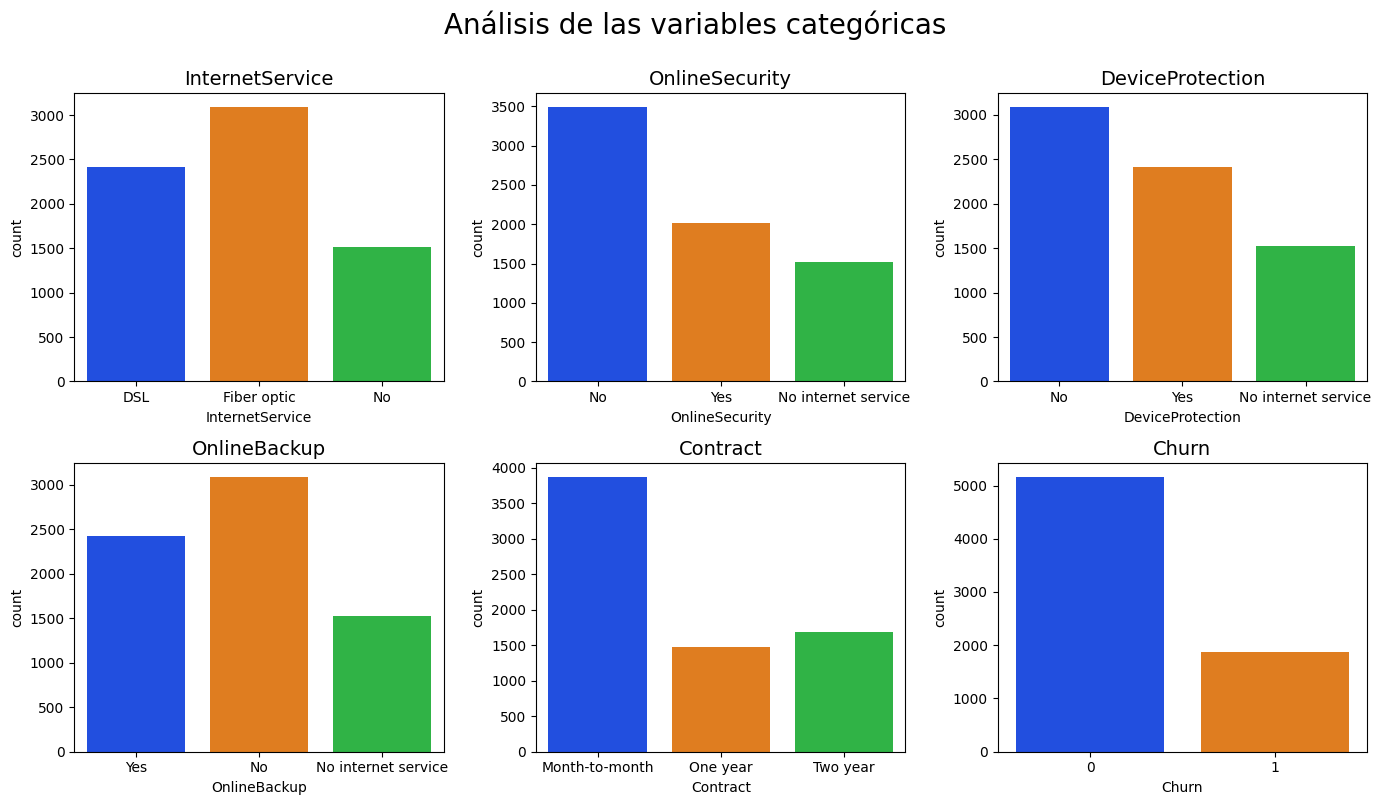

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
fig.suptitle('Análisis de las variables categóricas', fontsize=20, y=1.0)
cat_cols = ['InternetService', 'OnlineSecurity', 'DeviceProtection', 'OnlineBackup', 'Contract', 'Churn']

for i, col in enumerate(cat_cols):
    row = i // 3
    pos = i % 3
    if row<6:
        sns.countplot(x=col, data=telecom, ax=axs[row][pos], palette='bright')
        axs[row][pos].set_title(col, fontsize=14)

plt.tight_layout()
plt.show()

### 3.2 Variables Categóricas y Tasa de abandono

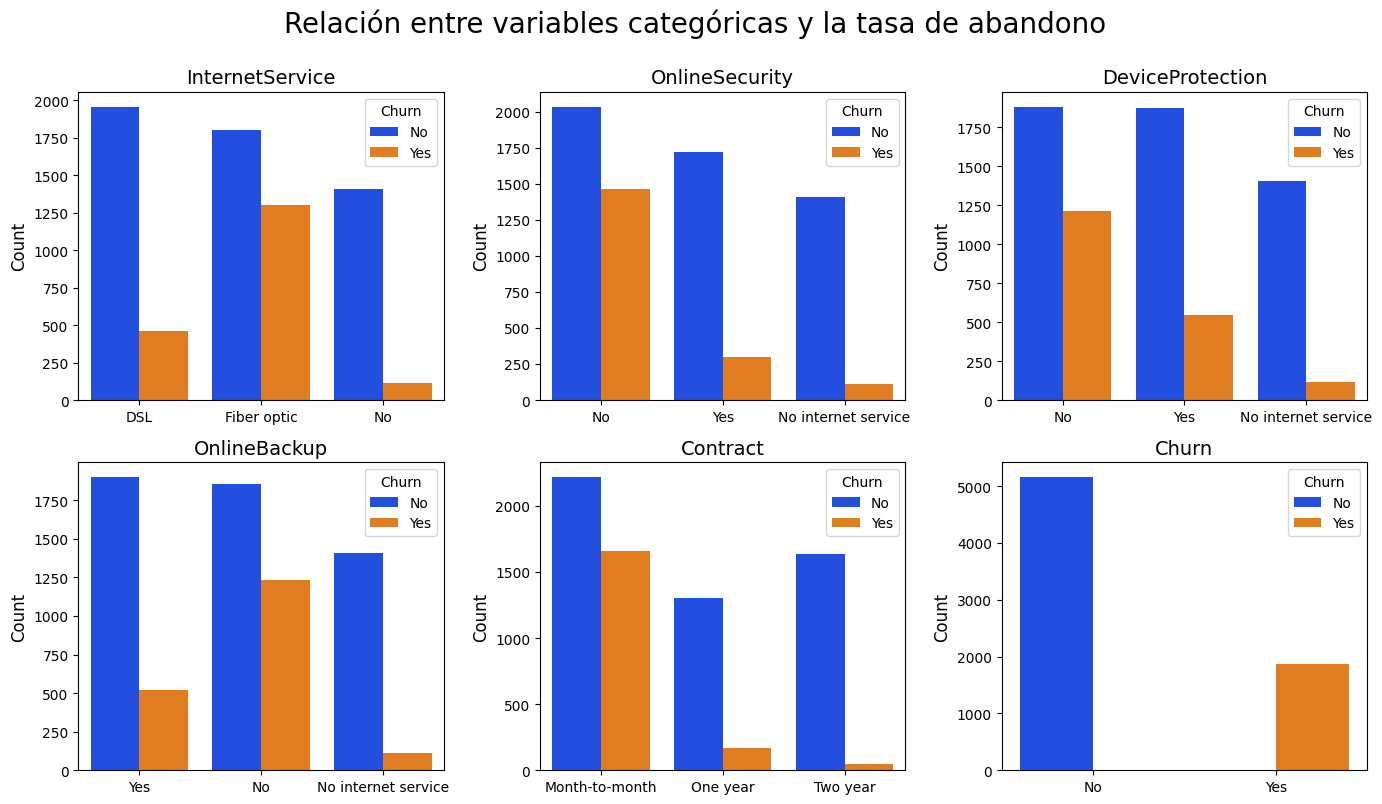

In [ ]:
df_temp = telecom.loc[:, ['InternetService', 'OnlineSecurity', 'DeviceProtection', 'OnlineBackup', 'Contract', 'Churn']]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
fig.suptitle('Relación entre variables categóricas y la tasa de abandono', fontsize=20, y=1.0)

for i, col in enumerate(cat_cols):
    row = i // 3
    pos = i % 3
    sns.countplot(x=col, hue='Churn', data=df_temp, ax=axs[row][pos], palette='bright')
    axs[row][pos].set_title(col, fontsize=14)
    axs[row][pos].set_xlabel('')
    axs[row][pos].set_ylabel('Count', fontsize=12)
    axs[row][pos].legend(title='Churn', loc='upper right')

plt.tight_layout()
plt.show()

#### Luego de analizar estas variables, podemos concluir en que hay algunas de ellas influyendo en la tasa de abandono.

'InternetService'. Los clientes que contratan el servicio con DSL son los mas comunes, pero los clientes que contratan el servicio de fibra optica son los que tienen la mayor tasa de abandono.

'OnlineSecurity'. La mayoría de los clientes que si tienen servicio de internet no tienen contratado el servicio de seguridad y a su vez, son los de mayor abandono.

'Contract'. La mayor parte de los clientes tienen contratado el servicio mes a mes, por lo tanto, al no generar una fidelidad con la empresa, son ellos mismos los que tienen la mayor tasa de abandono.

---

###3.3 Duración del contrato y Tasa de abandono

<ipython-input-28-c9ededfd0588>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  contract_churn['percent'] = contract_churn.groupby(['Contract'])['counts'].apply(lambda x:100 * x / float(x.sum()))


<Figure size 800x600 with 0 Axes>

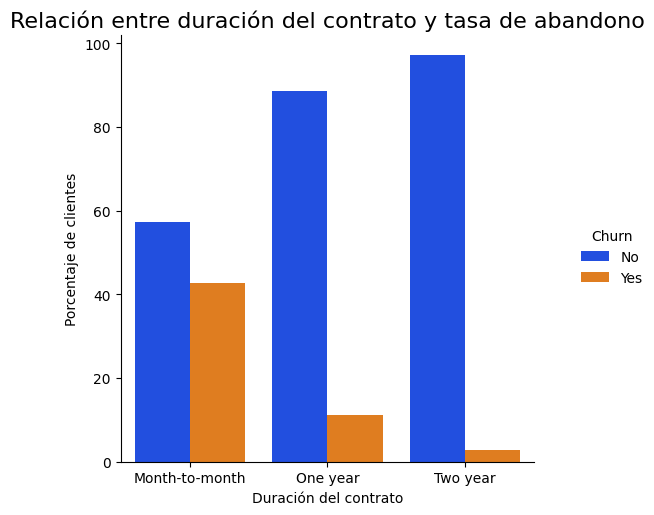

In [ ]:
contract_churn = telecom.groupby(['Contract', 'Churn']).size().reset_index(name='counts')
contract_churn['percent'] = contract_churn.groupby(['Contract'])['counts'].apply(lambda x:100 * x / float(x.sum()))

plt.figure(figsize=(8,6))
sns.catplot(x='Contract', y='percent', hue='Churn', data=contract_churn, kind='bar', palette='bright')
plt.title('Relación entre duración del contrato y tasa de abandono', fontsize=16)
plt.xlabel('Duración del contrato')
plt.ylabel('Porcentaje de clientes')
plt.show()

Se observa que los clientes que mantienen un contrato de menor duración son los que presentan una tasa de abandono mas alta

###3.4 Servicio de internet y Tasa de abandono

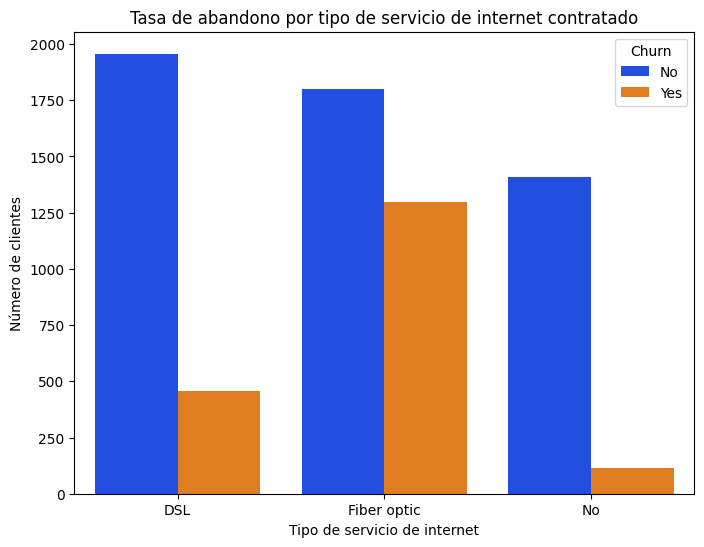

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='InternetService', hue='Churn', data=telecom, palette='bright')
plt.title('Tasa de abandono por tipo de servicio de internet contratado')
plt.xlabel('Tipo de servicio de internet')
plt.ylabel('Número de clientes')
plt.show()

Podemos observar que los clientes que contratan fibra óptica son los que tienen mayor tasa de abandono

###3.5 Descripción de variables numéricas


Media de tenure: 32.421786120591584
Media de MonthlyCharges: 64.79820819112628
Media de TotalCharges: 2283.300440841866
Media de SeniorCitizen: 0.16240045506257111


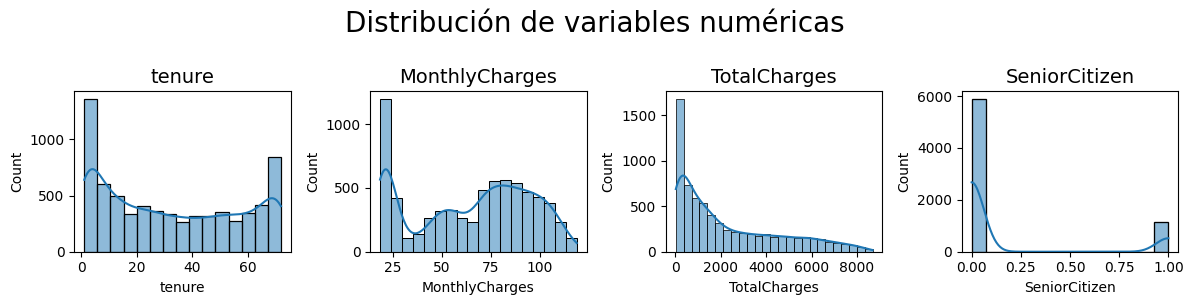

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12, 3))
fig.suptitle('Distribución de variables numéricas', fontsize=20, y=1.0)

# Variables numéricas
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']

for i, col in enumerate(num_cols):
    sns.histplot(x=col, data=telecom, ax=axs[i], kde=True)
    axs[i].set_title(col, fontsize=14)
    print(f'Media de {col}: {telecom[col].mean()}')

plt.tight_layout()
plt.show()

<Axes: >

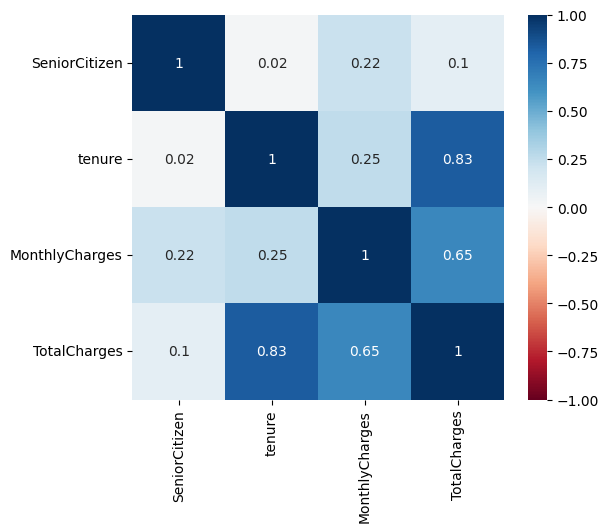

In [ ]:
correlacion=telecom.corr()
plt.figure(figsize=(6,5))
sns.heatmap(correlacion.round(2),vmin=-1, vmax=1,cmap='RdBu',annot=True)

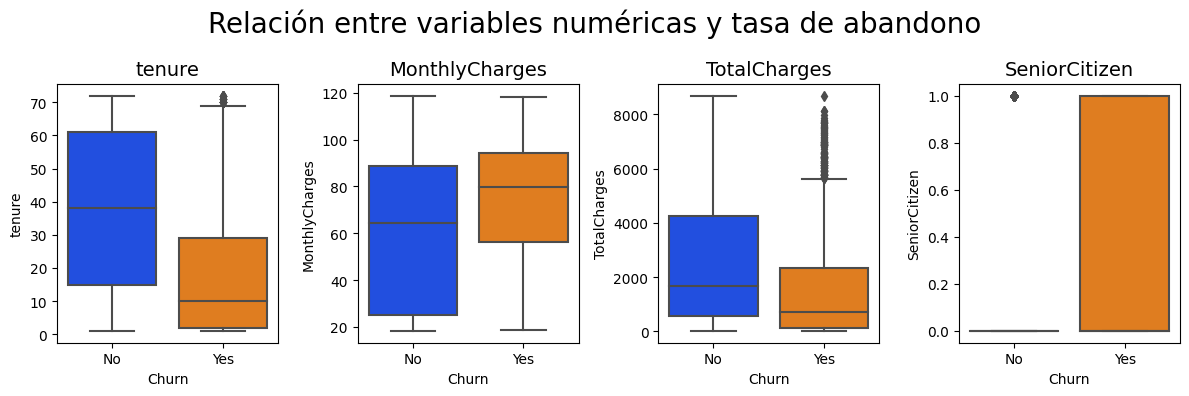

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
fig.suptitle('Relación entre variables numéricas y tasa de abandono', fontsize=20)

for i, col in enumerate(num_cols):
    sns.boxplot(x='Churn', y=col, data=telecom, ax=axs[i], palette='bright')
    axs[i].set_title(col, fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
total_customers = telecom['customerID'].nunique()
churned_customers = telecom[telecom['Churn'] == '1']['customerID'].nunique()
churn_rate = churned_customers / total_customers
print('Tasa de abandono: {:.2%}'.format(churn_rate))

Tasa de abandono: 26.58%


In [ ]:
#Calculo Desvio Estandar de "TotalCharges"
desvio_estandar = np.std(telecom.TotalCharges)
desvio_estandar

2266.610180714535

In [ ]:
import scipy as sc

In [ ]:
#Calculo Desvio absoluto de la mediana de "TotalCharges"
des_abs = sc.stats.median_abs_deviation(telecom.TotalCharges)
des_abs

1222.7999999999997

La desviacion estandar muestra que tan dispersos estan los datos respecto a la media de la variable. La media de TotalCharges es 2283 como se muestra anteriormente. Esto significa que la variable tiene un gran desvío.

A su vez el desvío absoluto indica que tan alejados estan los datos respecto a la media

In [ ]:
#Calculo de Varianza de TotalCharges
vrza = np.var(telecom.TotalCharges)
vrza

5137521.711318777

La varianza muestra la variabilidad de TotalCharges respecto al valor promedio. Se calcula con el valor promedio al cuadrado, lo cual nos genera un valor muy alto.

***Concluimos en que la Desviacion Estandar refleja mejor la dispersión de los datos respecto a la media, calculada como la raíz cuadrada de la Varianza***

In [ ]:
#Intervalo Intercuartil
iqr = sc.stats.iqr(telecom.TotalCharges, rng=(25,75))
iqr

3393.2875000000004

Se identifica el ancho del intervalo intercuartil (50% de los datos). Al ser muy ancho, llegamos a la conclusión de que tenemos una gran dispersión intercuartil

###3.6 Conclusiones EDA y Data Wrangling
***VARIABLES CATEGÓRICAS***

Luego de realizar un análisis por las variables categóricas del dataset, se pueden indentificar algunos factores que influyen en la tasa de abandono de los clientes. Se calculó que la tasa de abandono en el dataset es de 26.58%, y que la duración media de los contratos es de 32 meses.

La duración del contrato parece ser importante ya que los clientes con contratos cortos presentan una tasa de abandono mayor que los clientes con contratos mas largos. Otra variable importante resulta 'InternetService' donde los clientes que contratan el servicio de fibra óptica tienen una tasa de abandono mas alta comparados con los que contratan servicios de DSL o sin servicio de internet.

Tambien es importante considerar que los clientes que contratan algun servicio de seguridad online como 'OnlineSecurity' y 'DeviceProtection' muestran una tasa de abandono mas baja que los que no lo tienen.

***VARIABLES NUMÉRICAS***

Habiendo realizado el análisis exploratorio de los datos, podemos establecer algunas conclusiones respecto a las variables numéricas vistas. Primero, se puede ver que la duración del contrato y el cargo mensual tienen una relación inversa con la tasa de abandono, lo q indica que los clientes con contratos largos y cargos mensuales bajos, tienen a abandonar menos la empresa.

Ademas existe una alta correlación entre las variables "tenure" y "TotalCharges"; esto quiere decir que los clientes que se mantienen durante mas tiempo con los servicios de la empresa contratados, tambien son los que pagan mas en sus facturas totales. Otras variables con alta correlacion son "MonthlyCharges" y "TotalCharges", en donde la facturación total está indicando que es mayor a medida que los cargos mensuales tambien son mayores.

##4. Feature Selection

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,confusion_matrix,ConfusionMatrixDisplay,accuracy_score, recall_score,precision_score
from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector as SequentialFeatureSelector2

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    pvals = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
            pvals.append(new_pval.min())
            print(best_features, new_pval.min())
        else:
            break
    return best_features, pvals

def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    worst_features = []
    pvals = []
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        print(features, p_values.min())
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
            worst_features.append(excluded_feature)
            pvals.append(p_values.max())
        else:
            break
    return features, worst_features, pvals

def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            print(best_features, new_pval.min())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                    print(best_features, p_values.max())

                else:
                    break
        else:
            break
    return best_features,

In [61]:
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
!pip install metrics

###4.1 Forward Selection

In [ ]:
X = telecom.drop(['TotalCharges'], axis=1)
y = telecom['TotalCharges']

# Conjunto de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
best_features, pvals = forward_selection(X,y,significance_level=0.05)

['MonthlyCharges'] 0.0
['MonthlyCharges', 'tenure'] 0.0
['MonthlyCharges', 'tenure', 'SeniorCitizen'] 0.0003711574187748194


###4.2 Stepwise Selection

In [ ]:
best_features=stepwise_selection(X,y,SL_in=0.05,SL_out = 0.05)

['MonthlyCharges'] 0.0
['MonthlyCharges', 'tenure'] 0.0
['MonthlyCharges', 'tenure', 'SeniorCitizen'] 0.0003711574187748194


##5. Evaluación del Modelo

###5.1 Regresión

In [9]:
# Tratamos de explicar la variable 'TotalCharges'

x=telecom[{'tenure', 'MonthlyCharges', 'SeniorCitizen'}]
y=telecom['TotalCharges']

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [11]:
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [12]:
#Predecimos los valores de 'y'

y_estimated = lr.predict(x_train)
y_estimated

array([-134.47152051, 2242.46494009, 5591.25700391, ..., 3877.98673501,
       1873.76709867, 3360.68682866])

In [13]:
#Visualizamos el coeficiente de cada una de las variables de la regresión

lr.coef_

array([  65.13738565,   36.10578551, -102.25900494])

In [14]:
#Visualizamos el intercepto
lr.intercept_

-2148.691808424444

In [15]:
coef_df = pd.DataFrame(lr.coef_, x.columns, columns=['Coeficiente'])
coef_df

,Coeficiente
tenure,65.137386
MonthlyCharges,36.105786
SeniorCitizen,-102.259005


Luego del cálculo realizado se muestran los coeficientes de las variables independientes, donde el mas importante es 'tenure' y muestra como los clientes que permanecen mas tiempo en la empresa son los que tienen mas pagos en 'TotalCharges'. En este caso el coeficiente es 65.13 y demuestra que el valor de 'TotalCharges' esta determinado en un 65% por 'tenure'

---

Text(0.5, 1.0, 'R2 = 0.894, RMSE = 539696.201, MAE = 586.221')

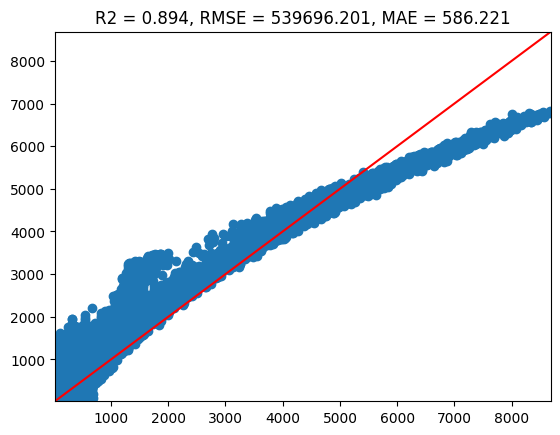

In [ ]:
# Calculamos el coeficiente de determinación del entrenamiento
y_estimated=lr.predict(x_train)
r2=r2_score(y_train,y_estimated)
RMSE=mean_squared_error(y_train, y_estimated)
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_train,y_estimated)

plt.scatter(y_train, y_estimated)
plt.plot([0,y_train.max()],[0,y_train.max()], color='r')
plt.ylim(y_train.min(),y_train.max())
plt.xlim(y_train.min(),y_train.max())
plt.title('R2 = ' + str(np.round(r2,3))+', RMSE = '+str(np.round(RMSE,3))+', MAE = '+str(np.round(MAE,3)))

Respecto al resultado obtenido en el train, podemos afirmar que las variables independientes utilizadas en el calculo explican en un 89,4% la variable dependiente

---

Text(0.5, 1.0, 'R2 = 0.898, RMSE = 533117.345, MAE = 591.791')

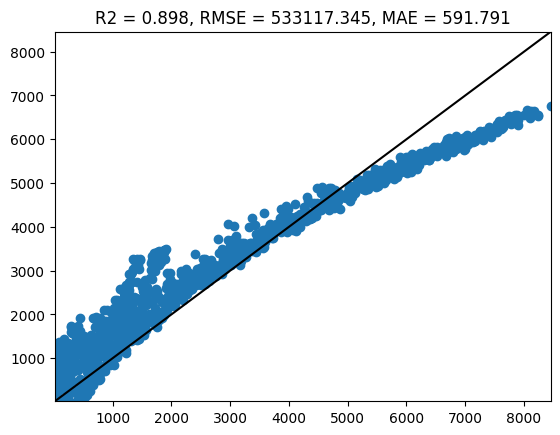

In [ ]:
# Calculamos el coeficiente de determinación del test
y_estimated2=lr.predict(x_test)
r2=r2_score(y_test,y_estimated2)
RMSE=mean_squared_error(y_test, y_estimated2)
MAE = mean_absolute_error(y_test,y_estimated2)

plt.scatter(y_test, y_estimated2)
plt.plot([0,y_test.max()],[0,y_test.max()], color='k')
plt.ylim(y_test.min(),y_test.max())
plt.xlim(y_test.min(),y_test.max())
plt.title('R2 = ' + str(np.round(r2,3))+', RMSE = '+str(np.round(RMSE,3))+', MAE = '+str(np.round(MAE,3)))

Respecto al resultado obtenido en el test, podemos afirmar que las variables independientes utilizadas en el calculo explican en un 89,8% la variable dependiente

In [ ]:
# Creamos un df en el cual mostramos el valor actual de y, el valor predicho, el sesgo y el porcentaje de error
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_estimated2})
df['Sesgo']=df.Actual -df.Predicted
df['Error_porc']=((df.Actual -df.Predicted)/df.Actual) *100
df

,Actual,Predicted,Sesgo,Error_porc
3530,79.15,774.218501,-695.068501,-878.166141
5795,1663.50,3338.990846,-1675.490846,-100.720820
3290,5714.20,5436.883957,277.316043,4.853104
3535,2070.75,2510.740270,-439.990270,-21.247870
489,6597.25,5738.849809,858.400191,13.011485
...,...,...,...,...
5842,3836.30,4029.378719,-193.078719,-5.032941
6832,865.80,1750.250483,-884.450483,-102.154133
1352,5315.10,5001.892498,313.207502,5.892787
1278,62.80,183.888907,-121.088907,-192.816732


In [ ]:
# Calculamos el valor promedio del sesgo
df.Sesgo.mean()

-14.301070885490693

###5.2 Arbol de Decisión

Usaremos una variable independiente (tenure) y una dependiente (TotalCharges)

In [ ]:
#Dividimos el set de train en feature y target
feature_name = "tenure"
target_name = "TotalCharges"
data_train, target_train = telecom[[feature_name]], telecom[target_name]

In [ ]:
#Definimos el dataset del testing
data_test = pd.DataFrame(np.arange(data_train[feature_name].min(), data_train[feature_name].max()),columns=[feature_name],)

In [ ]:
#Creamos el árbol de decisión para regresión
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(criterion='squared_error', splitter='best',max_depth=2) # Establecemos que la máxima profundidad del árbol es 2
tree.fit(data_train, target_train)
target_predicted = tree.predict(data_test)

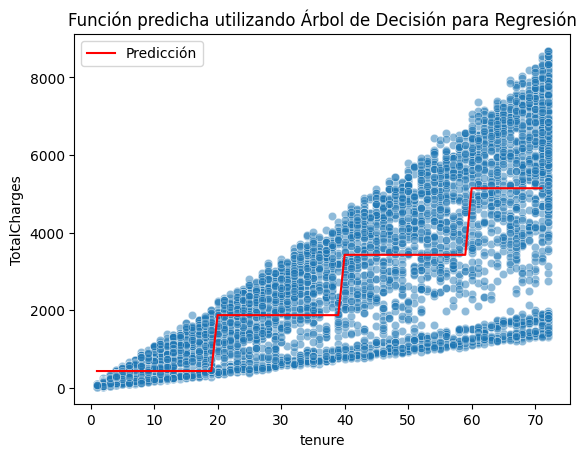

In [ ]:
sns.scatterplot(data=telecom, x=feature_name, y=target_name, alpha=0.5)
plt.plot(data_test[feature_name], target_predicted, label="Predicción", color = "red")
plt.legend()
_ = plt.title("Función predicha utilizando Árbol de Decisión para Regresión")

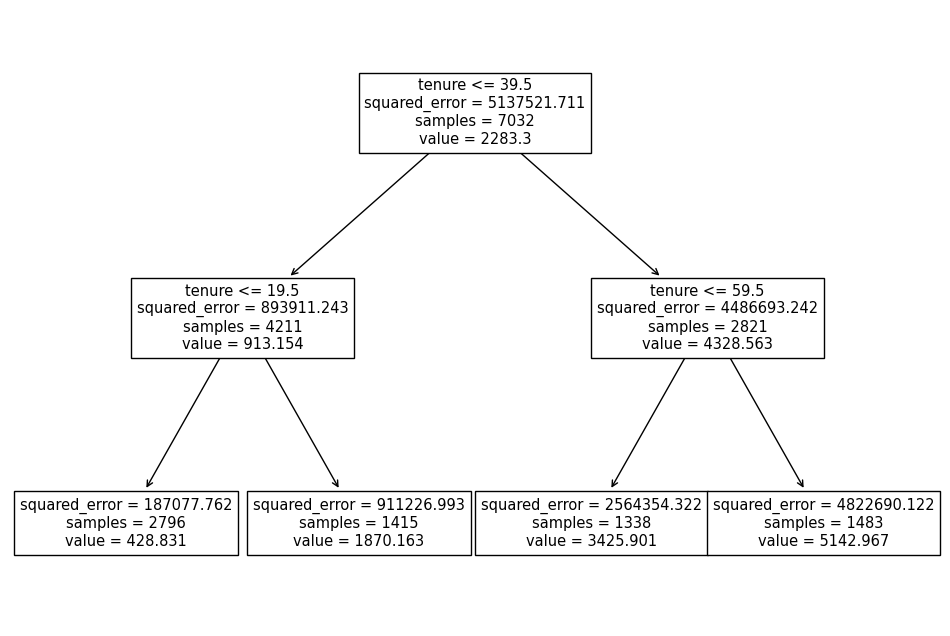

In [ ]:
#Graficamos el árbol de decisión
from sklearn.tree import plot_tree
_, ax = plt.subplots(figsize=(12, 8))
_ = plot_tree(tree, feature_names=[feature_name], ax=ax)

---

####Ahora usaremos la variable independiente (TotalCharges) y trateremos de explicar la variable dependiente (Churn)

In [ ]:
#Dividimos el set de train en feature y target
feature_name = "TotalCharges"
target_name = "Churn"
data_train, target_train = telecom[[feature_name]], telecom[target_name]

In [ ]:
#Definimos el dataset del testing
data_test = pd.DataFrame(np.arange(data_train[feature_name].min(), data_train[feature_name].max()),columns=[feature_name],)

In [ ]:
#Creamos el árbol de decisión para regresión
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(criterion='squared_error', splitter='best',max_depth=2) # Establecemos que la máxima profundidad del árbol es 2
tree.fit(data_train, target_train)
target_predicted = tree.predict(data_test)

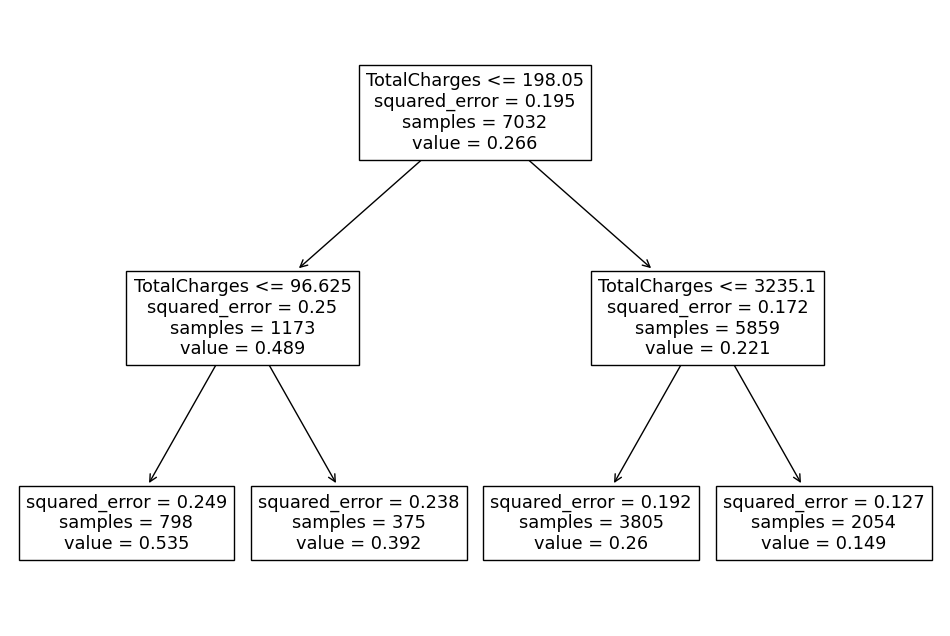

In [ ]:
#Graficamos el árbol de decisión
from sklearn.tree import plot_tree
_, ax = plt.subplots(figsize=(12, 8))
_ = plot_tree(tree, feature_names=[feature_name], ax=ax)

##6. Aprendizaje supervisado. Modelo de clasificación

In [17]:
# Definimos las variables del problema de clasificación
x_clas = telecom[['TotalCharges']]
y_clas = telecom['Churn']

In [19]:
# Dividimos en train y test
x_clas_train, x_clas_test, y_clas_train, y_clas_test = train_test_split(x_clas, y_clas, test_size=0.4, random_state=100)

In [21]:
# Definimos el modelo
LogReg = linear_model.LogisticRegression().fit(x_clas_train,y_clas_train)
y_clas_pred = LogReg.predict(x_clas_test)

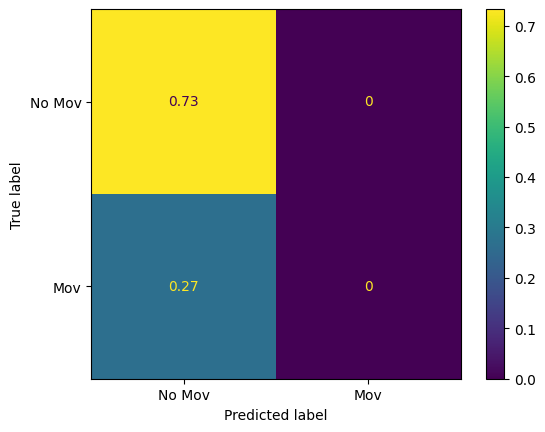

In [22]:
# Creamos la matriz de confusión, en donde elegimos el tipo de normalización 'all' para que la suma de la matriz sea el 100%
cm = confusion_matrix(y_clas_test, y_clas_pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['No Mov','Mov'])
disp.plot()
plt.show()

Los resultados obtenidos a partir de la matriz de confusión nos muestran que nuestro modelo predice correctamente un 73% de las veces los Verdaderos Negativos (predijo que no había movilidad, siendo que no hubo);  y un 27% de Falsos Negativos o sorpresas (predijo que no había movilidad, siendo que sí hubo).

Esto quiere decir que el modelo predice el 73% de las veces en que un cliente deja la empresa cuando efectivamente lo hace.

---

###Accuracy

In [30]:
accuracy_score(y_clas_test,y_clas_pred)

0.7330252399573409

La métrica llamada accuracy nos muestra el porcentaje de veces que el modelo predice correctamente la categoría. A partir del resultado obtenido, se puede afirmar que el 73% de las veces el modelo predijo correctamente la categoría, mientras que el 27% restante de las veces no, en donde se produjeron sorpresas o falsas alarmas.

In [33]:
LogReg.predict_proba(x_clas_test)

array([[0.73473678, 0.26526322],
       [0.87319339, 0.12680661],
       [0.71209194, 0.28790806],
       ...,
       [0.8110544 , 0.1889456 ],
       [0.69727226, 0.30272774],
       [0.65193834, 0.34806166]])

In [62]:
roc_auc_score(y_clas_test.values, LogReg.predict_proba(x_clas_test)[:,1])

0.661349367994307

La curva ROC-AUC se utiliza para medir el rendimiento del modelo de clasificación, en donde, cuanto más cercano a 1 esté el AUC, mejor es nuestro clasificador para predecir las categorías. En este caso el AUC es de 0,66 lo cual indica que nuestro modelo es bueno para predecir si hubo o no renuncia por parte de los clientes

In [63]:
resultados = pd.DataFrame({'target':y_clas_test, 'proba_pred':LogReg.predict_proba(x_clas_test)[:,1]})

<Axes: xlabel='target', ylabel='proba_pred'>

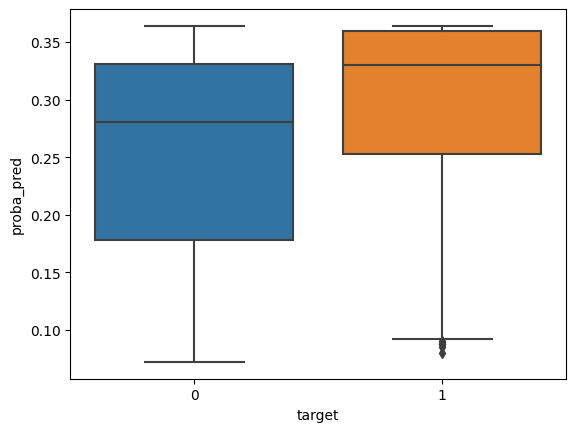

In [64]:
sns.boxplot(y='proba_pred', x='target', data=resultados)

##7. Conclusiones del Modelo

**Train**

$R^2$: 0.894

$RMSE$: 539696.201

$MAE$: 586.221

**Test**

$R^2$: 0.898

$RMSE$: 533117.345

$MAE$: 591.791


Teniendo en cuenta los resultados obtenidos en la medición del modelo predictivo, podemos concluir que las variables independientes explican el 89% del comportamiento de la variable dependiente (TotalCharges).

Ademas, analizando los gráficos, concluimos que no existe Underfitting o Overfitting y que el modelo de test se comporta de la misma manera que el modelo train

**Conclusiones del modelo Arbol de Decisión**

**Tenure y Total Charges**

El arbol comienza dividiendo la muestra en 2 partes: cuando los clientes forman parte de la empresa hace 39.5 meses. En ese caso, el valor predicho para los cargos totales que se le cobran al cliente es de 2283.3$.

La primer rama del arbol se sitúa en el valor de 'tenure' 19.5 meses, y predice que 'TotalCharges' será $913.154. Por otro lado, si 'tenure' es 59.5 meses, predice 'TotalCharges' será 4328.563.

Luego el modelo predice que, dentro de los clientes que llevan 19.5 meses de contrato, 2796 clientes pagarán aproximadamente uSd 428.831 y 1415 clientes pagarán uSd 1870.163

Si vemos los clientes que se mantienen por 59.5 meses, el modelo predice que 1338 pagarán uSd 3425.901 y 1483 clientes pagarán uSd 5142.967

**Total Charges y Churn**

En primer lugar, el arbol divide la muestra en usd 198.05. En ese caso, el 26% de los clientes dejan la empresa.

Luego de la primera división, se muestra la primer rama al valor usd 96.62, prediciendo que el 48% de los clientes abandonaron la compañía. La otra rama da como resultado usd 3235.1 siendo 22% la tasa de abandono.

Luego de haber analizado los cargos totales que pagan los clientes en la empresa, llegamos a la conclusión de que 'TotalCharges' no es una variable negativa respecto a el comportamiento de 'Churn'. Esto quiere decir que a medida que mas tiempo pasen los clientes con el servicio contratado, obviamente mas cargos totales han pagado. Pero a la vez, se refleja que son ellos mismos los que tienen la tasa de abandono mas baja.

---

Como conclusión final, habiendo analizado el dataset con el objetivo de predecir la tasa de abandono y saber cuales son los factores que influyen en la misma, como la duración del contrato, los cargos pagados y el tipo de servicio contratado, la empresa deberá tomar decisiones respecto a la captación de nuevos clientes e intentar retener a los actuales clientes. Los resultados muestran que una vez que el cliente siente confianza, se mantiene en la empresa y se genera una fidelidad donde la tasa de abandono es mas baja. Por el contrario, los clientes con contratos cortos (Month to month) y con ciertos tipos de servicios contratados (específicamente con Fibra Optica), son los que presentan mayor tasa de abandono. La empresa deberá poner el foco en ambas variables para mejorar sus resultados a futuro.


